In [1]:
#Import Packages
##Import Packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy

from scipy.signal import find_peaks

In [8]:
#Get Data
cols = ["File_num",	"Thickness", "Bias_Voltage", "Sample_Voltage",	"Current", "Resistance", "Resistivity"]
raw_data1 = pd.read_csv("LAB 1 data file - Sheet1.csv", names=cols, skiprows=2)
raw_data2 = pd.read_csv("LAB 1 data file - Sheet2.csv", names=cols, skiprows=2, skipfooter=24, engine="python")
raw_data3 = pd.read_csv("LAB 1 data file - Sheet3.csv", names=cols, skiprows=7, skipfooter=0, engine="python")

raw_data3

,File_num,Thickness,Bias_Voltage,Sample_Voltage,Current,Resistance,Resistivity
0,5260,0.072,0.198,0.18,1.980000e-08,9090.909091,0.000006
1,5261,0.073,1.633,1.39,1.633000e-07,8511.941212,0.000006
2,5262,0.074,3.481,2.96,3.481000e-07,8503.303648,0.000006
3,5263,0.075,5.442,4.26,5.442000e-07,7828.004410,0.000006
4,5264,0.076,7.018,5.91,7.018000e-07,8421.202622,0.000006
...,...,...,...,...,...,...,...
74,5334,0.145,41.462,6.48,4.146200e-06,1562.876851,0.000002
75,5335,0.146,41.568,6.45,4.156800e-06,1551.674365,0.000002
76,5336,0.147,41.663,6.41,4.166300e-06,1538.535391,0.000002
77,5337,0.148,41.780,6.36,4.178000e-06,1522.259454,0.000002


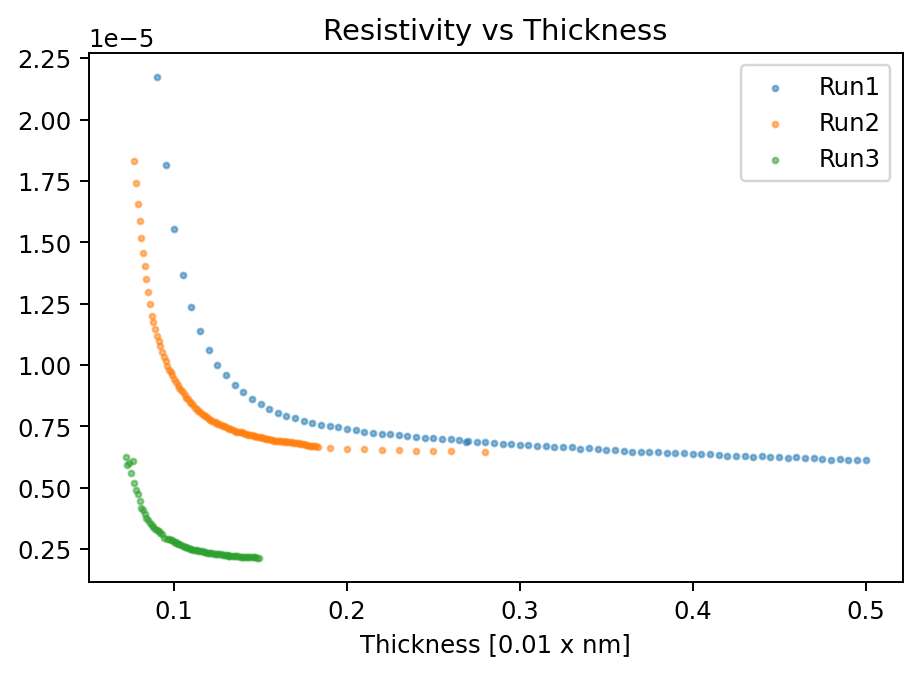

In [9]:
plt.figure(dpi=175)
plt.title("Resistivity vs Thickness")
plt.xlabel("Thickness [0.01 x nm]")
#plt.ylabel("Resistivity [unit]")


plt.scatter(raw_data1["Thickness"], raw_data1["Resistivity"], s=5, alpha=0.5, label="Run1")
plt.scatter(raw_data2["Thickness"], raw_data2["Resistivity"], s=5, alpha=0.5, label="Run2")
plt.scatter(raw_data3["Thickness"], raw_data3["Resistivity"], s=5, alpha=0.5, label="Run3")
plt.legend()
#plt.ylim(50,60)
#plt.legend()

#plt.savefig("Plots/Nitrogen_Signal_Freq.pdf")
plt.show()


### Data Fitting

NameError: name 'rational_func' is not defined

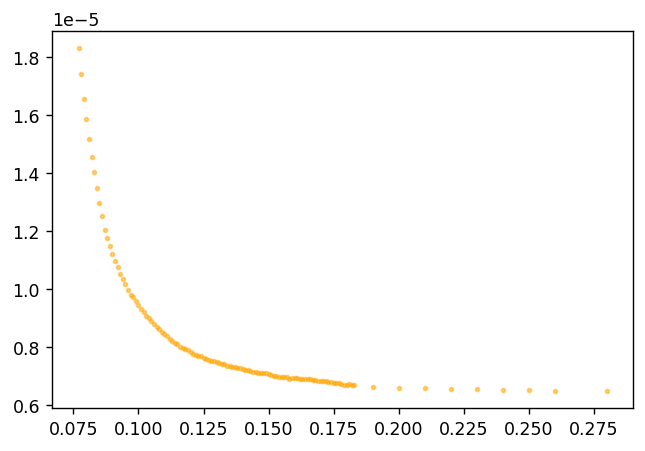

In [4]:
x = np.arange(0.07,0.5, 0.001)

plt.figure(dpi=125)
plt.scatter(raw_data2["Thickness"], raw_data2["Resistivity"], s=5, alpha=0.5, label="Run1", color="orange")

plt.plot(x, rational_func(x, *[10**-8,0.045,.6*10**-5, -2]))

[ 1.03820130e-08  5.62132619e-02  6.26197860e-06 -1.82401540e+00]
[1.04772240e-09 6.18426550e-04 1.56670656e-08 3.89274406e-02]
[10.09170769  1.10014351  0.25019354  2.13416184]


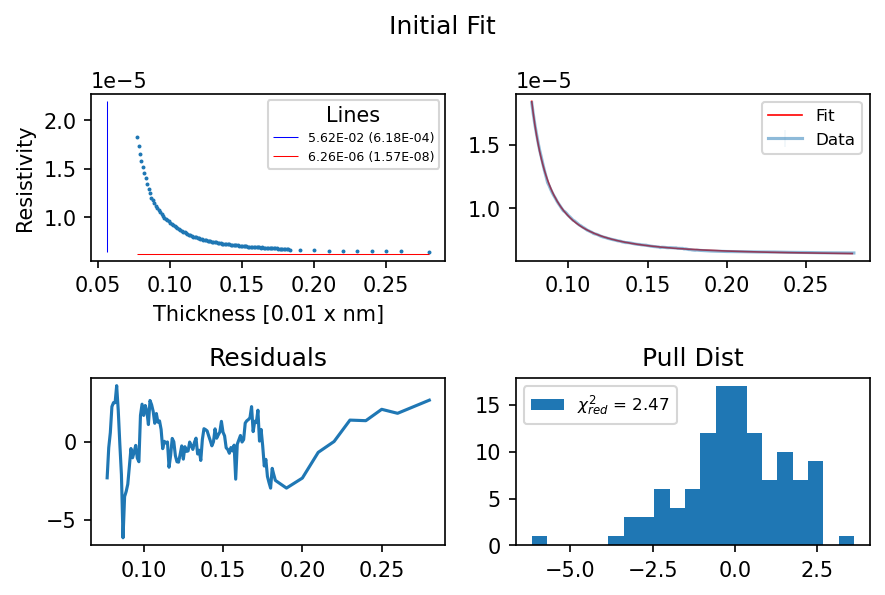

CPU times: user 805 ms, sys: 151 ms, total: 955 ms
Wall time: 1.02 s


In [5]:
%%time
def rational_func(x, a,b,c, n):
    return a*(x-b)**n + c

func = rational_func

##Get Hist
plt.figure(dpi=150)
plt.suptitle(f"Initial Fit")
plt.subplot(2, 2, 1)
plt.xlabel("Thickness [0.01 x nm]")
plt.ylabel("Resistivity")

keeps = raw_data2["Thickness"] > -1

removes = []#[6, 10, 11]

if len(removes) != 0:
    Thickness = np.delete(raw_data2["Thickness"].values, removes)#[keeps]
    Resistivity = np.delete(raw_data2["Resistivity"].values, removes)#[keeps]
    
else:
    Thickness = raw_data2["Thickness"].values
    Resistivity = raw_data2["Resistivity"].values

plt.scatter(Thickness, Resistivity, s=.8)

errors = Resistivity/400

#pars, cov = scipy.optimize.curve_fit(single_Gauss, frequency.values, signal.values, #maxfev=3*10**5, sigma=errors,
#                                     p0=[3,460,20, 1],
#                                     bounds=([0.01,380,1, 0],
#                                             [5,520,200, 1.5]))
pars, cov = scipy.optimize.curve_fit(func, Thickness, Resistivity, maxfev=3*10**5, sigma=errors,
                                     p0=[4*10**-8,0.04,.6*10**-5, -2],
                                     bounds=([10**-12,-1,0, -10], [10**-5,1,1*10**-4, -0.1])
                                    )
#Mean Lines
plt.vlines(pars[1],np.min(Resistivity),np.max(Resistivity)*1.2, 
           label=f"{pars[1]:.2E} ({np.sqrt(cov.diagonal())[1]:.2E})", color="blue", lw=0.5)
plt.hlines(pars[-2],np.min(Thickness),np.max(Thickness), 
           label=f"{pars[-2]:.2E} ({np.sqrt(cov.diagonal())[-2]:.2E})", color="red", lw=0.5)

plt.legend(title="Lines", prop={"size":6})

#Plot Fit
plt.subplot(2, 2, 2)
x = np.arange(np.min(Thickness),np.max(Thickness),0.001)

plt.errorbar(Thickness, Resistivity, yerr=errors/10, 
             ms=.2, elinewidth=.1, alpha=0.5, label="Data")
plt.plot(x, func(x, *pars), color="red", lw=.8, label="Fit")
plt.legend(prop={"size":8})
#plt.xscale("log")
#plt.set_xticks(np.arange(300,901,50), minor=1)

print(pars)
print(np.sqrt(cov.diagonal()))
print(np.sqrt(cov.diagonal())/np.abs(pars)*100)

#Residuals
residuals = (Resistivity-func(Thickness, *pars))/errors
plt.subplot(2, 2, 3)
plt.title("Residuals")
plt.plot(Thickness, residuals)#, s=1)

#Pull Dist
plt.subplot(2, 2, 4)
plt.title("Pull Dist")
red = "{red}"
plt.hist(residuals, 21, label=f"$\chi_{red}^2$ = {np.sum(residuals**2)/len(residuals):.2f}")
plt.legend(prop={"size":8})

plt.tight_layout()
plt.savefig(f"Plots/Bi_Run2_Fit.pdf")
plt.show()

## Inverse Fitting

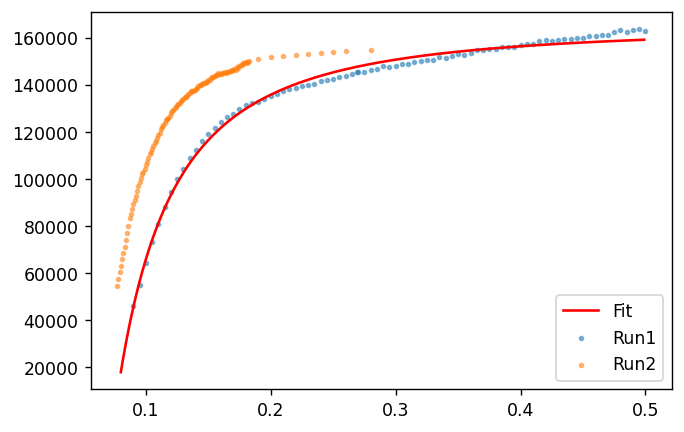

In [102]:
x = np.arange(0.08,0.5, 0.001)

plt.figure(dpi=125)
plt.scatter(raw_data1["Thickness"], 1/raw_data1["Resistivity"], s=5, alpha=0.5, label="Run1")
plt.scatter(raw_data2["Thickness"], 1/raw_data2["Resistivity"], s=5, alpha=0.5, label="Run2")
#[-9.95929545e+00 -5.88596914e-02  1.56198616e+05 -4.62916909e+00]
plt.plot(x, rational_func(x, *[-1.70031558e+03, -1.00000000e-05,  1.64931772e+05, -1.76587081e+00]), color="red", label="Fit")
plt.legend()

[-1.70031558e+03 -1.00000000e-05  1.64931772e+05 -1.76587081e+00]
[6.14374524e+02 1.46273580e-02 1.80224257e+03 2.60540828e-01]
[3.61329703e+01 1.46273580e+05 1.09272007e+00 1.47542406e+01]


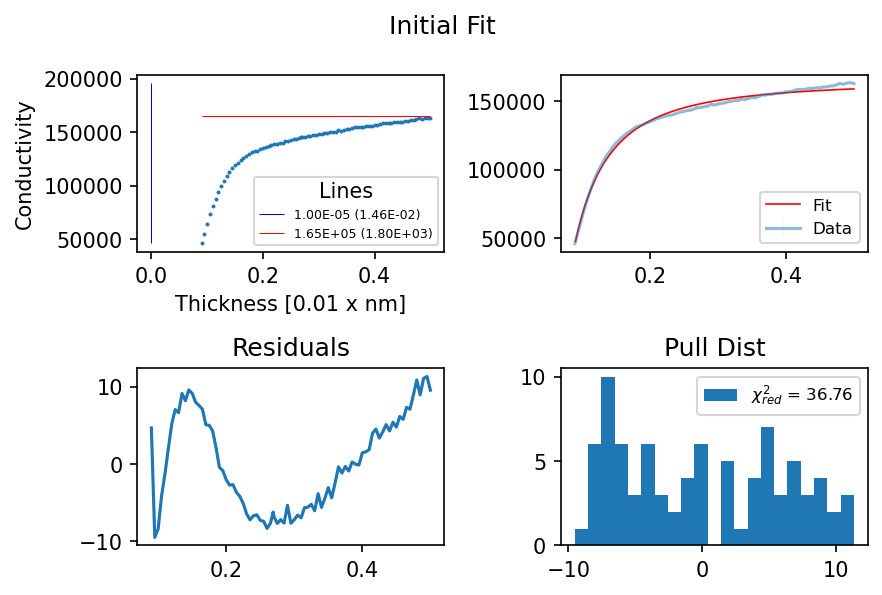

CPU times: user 706 ms, sys: 65.5 ms, total: 771 ms
Wall time: 783 ms


In [99]:
%%time
def prof_func(x, a,b,c, n):
    return a*(1-(x/b)**n) + c

def prof_func2(x, a,b,c, n):
    return a*(x-b)**n + c

def logistic_func(x, a,b,x0, d):
    return a/(1+np.exp(-b*(x-x0))) + d

func = rational_func
data_set = raw_data1

##Get Hist
plt.figure(dpi=150)
plt.suptitle(f"Initial Fit")
plt.subplot(2, 2, 1)
plt.xlabel("Thickness [0.01 x nm]")
plt.ylabel("Conductivity")

keeps = data_set["Thickness"] > -.2

removes = []#[6, 10, 11]

if len(removes) != 0:
    Thickness = np.delete(data_set["Thickness"][keeps].values, removes)#[keeps]
    Resistivity = np.delete(1/data_set["Resistivity"][keeps].values, removes)#[keeps]
    
else:
    Thickness = data_set["Thickness"][keeps].values
    Resistivity = 1/data_set["Resistivity"][keeps].values

plt.scatter(Thickness, Resistivity, s=.8)

errors = Resistivity/400

#pars, cov = scipy.optimize.curve_fit(single_Gauss, frequency.values, signal.values, #maxfev=3*10**5, sigma=errors,
#                                     p0=[3,460,20, 1],
#                                     bounds=([0.01,380,1, 0],
#                                             [5,520,200, 1.5]))
pars, cov = scipy.optimize.curve_fit(func, Thickness, Resistivity, maxfev=10**5, sigma=errors,
                                     p0=[-100,-0.06,1.7*10**5, -5],#[-10,-0.05,1.5*10**5, -4.6],
                                     bounds=([-10**10,-0.1,0, -20], [-1,-10**-5,10**8, -0.1])
                                    )
#Mean Lines
plt.vlines(-pars[1],np.min(Resistivity),np.max(Resistivity)*1.2, 
           label=f"{-pars[1]:.2E} ({np.sqrt(cov.diagonal())[1]:.2E})", color="blue", lw=0.5)
plt.hlines(pars[-2],np.min(Thickness),np.max(Thickness), 
           label=f"{pars[-2]:.2E} ({np.sqrt(cov.diagonal())[-2]:.2E})", color="red", lw=0.5)

plt.legend(title="Lines", prop={"size":6})

#Plot Fit
plt.subplot(2, 2, 2)
x = np.arange(np.min(Thickness)*1.01,np.max(Thickness),0.001)

plt.errorbar(Thickness, Resistivity, yerr=errors/10, 
             ms=.2, elinewidth=.1, alpha=0.5, label="Data")
plt.plot(x, func(x, *pars), color="red", lw=.8, label="Fit")
plt.legend(prop={"size":8})
#plt.xscale("log")
#plt.set_xticks(np.arange(300,901,50), minor=1)

print(pars)
print(np.sqrt(cov.diagonal()))
print(np.sqrt(cov.diagonal())/np.abs(pars)*100)

#Residuals
residuals = (Resistivity-func(Thickness, *pars))/errors
plt.subplot(2, 2, 3)
plt.title("Residuals")
plt.plot(Thickness, residuals)#, s=1)

#Pull Dist
plt.subplot(2, 2, 4)
plt.title("Pull Dist")
red = "{red}"
plt.hist(residuals, 21, label=f"$\chi_{red}^2$ = {np.sum(residuals**2)/len(residuals):.2f}")
plt.legend(prop={"size":8})

plt.tight_layout()
#plt.savefig(f"Plots/Bi_Run2_Fit.pdf")
plt.show()